# Group 20 CS210 Final Project

## Mannan Mishra mm3033, Andy Li asl155, Michelle Lee mwl52, Shreya Ashok sa1775

Below, We have included a link to the Kaggle dataset our group wants to use for our final project. 

https://www.kaggle.com/datasets/prishasawhney/imdb-dataset-top-2000-movies

First, let us summarize the dataset before elaborating on the potential findings we aim to deduce from the data and why this dataset will effectively demonstrate our learning from class. The data is derived from IMDB’s official website, and it is based on what IMDB’s critics deem to be the top 2000 movies. As such, there are 2000 rows of data in the dataset delimited by ten columns: Movie name, year of release, movie running time (in minutes), IMDB rating, Metascore, number of votes, Movie genres, movie director, lead actor/actress, and the gross values of the movie. The total CSV memory size is 203 kb.


The reason our group wanted to analyze this dataset is because we are curious about what factors influence IMDB ratings and Metascores. 

Often when people look up potential movies they want to watch on a Friday night, they use websites like IMDB to determine if a movie is worth the 1.5-3 hour commitments. Similarly, the film industry may also view these scores as an extended metric to validate or rebuke their success. These scores, while just numbers, play an integral role towards the public's perception of a film.

Therefore, our group believes it is worth exploring the different metrics at play as it pertains to the box office and IMDB in particular. We will analyze the factors: revenue,  release year, cast, number of votes, and genre. 

Our goal for the project is to come to a decisive conclusion on which factors directly influence IMDB ratings and Metascores.

As our project is also a means to demonstrate the skills we learned in class. Allow us please to begin by simply showing you a function we created to read a csv file using csvreader and going row by row.

Please note that detailed functions and background code are available in the IMDBAnalysis.py file.

Below, we read the csv into a list and then display the first row which highlight the different 10 columns we have in the dataset.

In [1]:
from IMDBAnalysis import read_csv_to_list
# Read the CSV file into a list of rows
rows = read_csv_to_list("imdb_top_2000_movies.csv")

# Access the data
print(f"Header: {rows[0]}")

Header: ['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Genre', 'Director', 'Cast', 'Gross']


Next, we want to demonstrate converting csv to a dataframe. As you can see, our dataframe also demonstrates the types of values we have in each individual column. In our Votes and Genre columns, we will be working with comma's in number form and separated data within the same column. In other columns, we also have null values to filter out when we analyze columns like Gross Value. The Year column presents its own set of challenges. The year column is of datatype "object" and sometimes has data in a YYYY format or a YYYY-YYYY format. Cleaning this required us to first convert the column to string, then isolate the format we wanted, and then convert back to integer values.

The shape of our dataframe is (2000, 10) meaning we have 2000 rows of information separated into 10 columns.

In [2]:
from IMDBAnalysis import read_csv_to_df
# Read the CSV file into a DataFrame
df = read_csv_to_df("imdb_top_2000_movies.csv")

# Access the data
print(df.head())
print(df.shape)

              Movie Name Release Year  Duration  IMDB Rating  Metascore  \
0          The Godfather         1972       175          9.2      100.0   
1  The Godfather Part II         1974       202          9.0       90.0   
2        Ordinary People         1980       124          7.7       86.0   
3     Lawrence of Arabia         1962       218          8.3      100.0   
4             Straw Dogs         1971       113          7.4       73.0   

       Votes                        Genre              Director  \
0  2,002,655                 Crime, Drama  Francis Ford Coppola   
1  1,358,608                 Crime, Drama  Francis Ford Coppola   
2     56,476                        Drama        Robert Redford   
3    313,044  Adventure, Biography, Drama            David Lean   
4     64,331       Crime, Drama, Thriller         Sam Peckinpah   

                Cast     Gross  
0      Marlon Brando  $134.97M  
1          Al Pacino   $57.30M  
2  Donald Sutherland   $54.80M  
3      Peter O

The first metric we want to compare is whether the monetary value a movie earns influences the movie's IMDB ratings. 

To do this, we first implemented the regex fucntionality to isolate out the numerical values from the text in the Gross column. Next, we converted the filtered column from text to numeric values. Once this was done, we could sort the entire dataframe by Gross value in descending order.

The output that results is a list of the top 20 highest grossing movies of all time along with their respective IMDB ratings and movie scores. 

As we can see, there is no relevant correlation that the more a movie earns, the higher it is scored. While a high earning movie like " The Dark Knight" may be highly rated, other blockbuster hits like the Star Wars franchise falls further behind in critical acclaim. Therefore, it is highly unlikely that box office results influence the IMDB Ratings and Metascores. 

In [3]:
from IMDBAnalysis import get_top_highest_grossing_movies

# Get the highest earning movies (can get as many as you want)
highest_earning_movies= get_top_highest_grossing_movies(df, n=20)
print(highest_earning_movies)

                                         Movie Name   Gross  IMDB Rating  \
1763                                         Avatar  760.51          7.9   
511                                         Titanic  659.33          7.9   
1508                                The Dark Knight  534.86          9.0   
764       Star Wars: Episode I - The Phantom Menace  474.54          6.5   
1076                                        Shrek 2  436.47          7.3   
350                      E.T. the Extra-Terrestrial  435.11          7.9   
1263     Pirates of the Caribbean: Dead Man's Chest  423.32          7.4   
516                                   The Lion King  422.78          8.5   
1797                                    Toy Story 3  415.00          8.3   
1012                                     Spider-Man  403.71          7.4   
554                                   Jurassic Park  402.45          8.2   
1822            Transformers: Revenge of the Fallen  402.11          6.0   
1066        

Since our group was already analyzing the money aspect of movies, we were curious and wanted to see how the average earnings of movies changed year over year. This process is where we suffered setbacks in trying to understand how to properly format our "Year" column. The solution we came up with was to first convert the column to string, then extracting a YYYY format from the String, and finally converting the entire column into integers. 

Below we can see that there is, for the most part, a linear correlation between the movie's average gross earnings and the year it was released. Earlier films tend to gross less revenue than later productions. However, we cannot fail to ignore the many many spikes and extreme points in our data. The most obvious being 1939. Let us look into that one further.

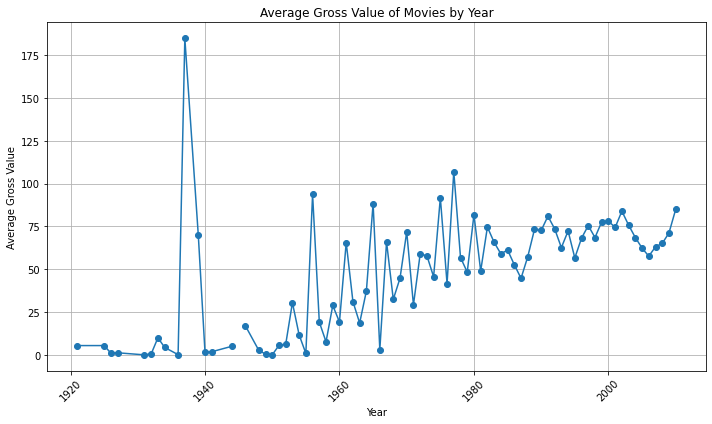

In [4]:
from IMDBAnalysis import plot_average_gross_by_year
# Plot the average gross value of movies by year
plot_average_gross_by_year(df)

Using similar data formatting and processing to solve the previous "Year" column quandry, we were able to filter out the movies released in 1939 and sort them by Gross value. Using this, we are able to discover that only 4 movies are in our dataset from 1939 and they have a great earnings disparity. Because there are such few datapoints in this year, the average of the three would yield an incredibly high value. Consequently, we would end up with a really high value for movies released in 1939.

In [5]:
from IMDBAnalysis import get_top_1939_movies_by_gross
# Get the top 5 movies made in 1939 by gross value
top_1939_movies = get_top_1939_movies_by_gross(df, n=5)
print(top_1939_movies)

                       Movie Name   Gross
129            Gone with the Wind  198.68
77   Mr. Smith Goes to Washington    9.60
74               The Wizard of Oz    2.08
144                    Stagecoach     NaN


Because our group noticed disparities in data quantities over certain years, we deemed it best to figure out the layout of the data we were analyzing. 

Below, we created a function that would group the movie release years by the decade and then display the results in a bar chart format.

In the results, we see that the number of movies are considerably higher for more recent decades. Because there are more recent films, the average earnings values from the previous graph would by more precise the further right of the graph than the left of the graph as each average towards the right constituted more unique data points. 

While this graphic does not directly answer any of the questions we outlined in the beginning, it is a turning point in our research because it made us more closely consider time as a factor for the next part of the analysis. 

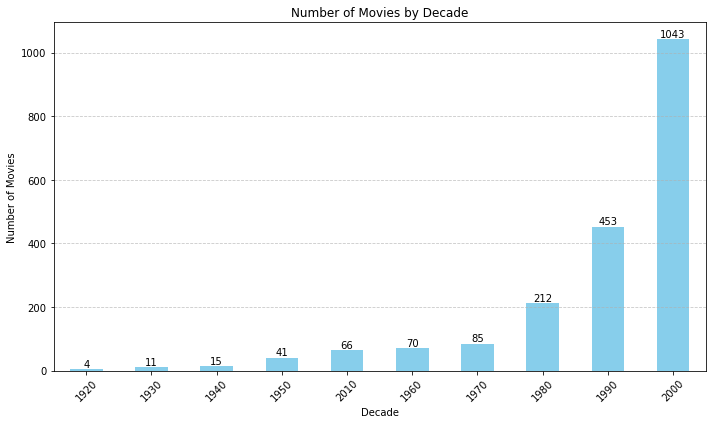

In [6]:
from IMDBAnalysis import plot_movies_by_decade 
# Plot the movies by decade
plot_movies_by_decade(df)

As we learned above, we have more films released in more recent decades than older films in our top 2000 movies dataset.

Therefore, we wanted to know how ratings would change year over year. The purpose of ascertaining this information was to determine whether nostalgia played a role in ratings.

As we can see from our two graphs below, older movies tend to have much higher Metascores and IMDB ratings. Moreover, there seems to be a negative linear correlation between the year a movie was released and its ratings. 

However, the year a movie is released shouldn't simply determine how it gets rated. Nostalgia is important but it does not mean people enjoy current movies worse than their previous counterparts. Therefore, we need to further look into this finding and figure out why current movies have lower average ratings.

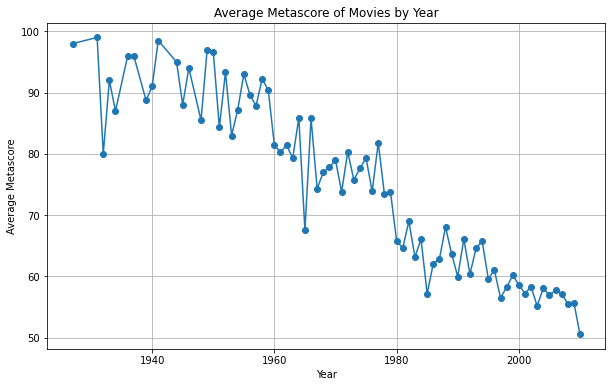

In [7]:
from IMDBAnalysis import plot_average_metascore_by_year
# Plot the average metascore of movies by year
plot_average_metascore_by_year(df)

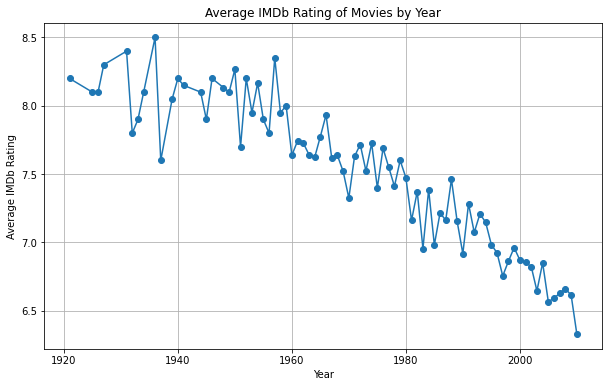

In [8]:
from IMDBAnalysis import plot_average_imdb_rating_by_year
# Plot the average IMDB rating of movies by year
plot_average_imdb_rating_by_year(df)

The way our group decided to ultimately analyze why ratings for movies went down over the years is by analyzing the number of critics reviewing the movie. Our thought process was that if the number of movies dramatically increased, then it should also mean that the number of people who review these movies must also increase. 

The graph below verifies our mini-hypothesis. As the years go on, there are an exponentially greater number of total people reviewing movies. 

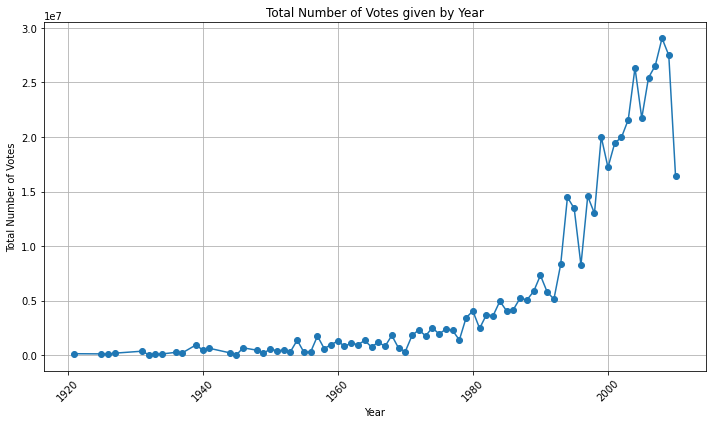

In [9]:
from IMDBAnalysis import plot_total_votes_by_year
# Plot the total critic votes by year
plot_total_votes_by_year(df)

Now that we established the premises that ratings go down over the years while the number of people increase, we wanted to see whether there was an actual correlation between the number of votes that a movie recieves and it's IMDB ratings/Metascore. 

Below we have two scatter plots. The first scatter plot plots the number of votes a movie recieved by its Metascore and the second plot plots the number of votes a movie recieved by its IMDB rating.

Through these plots (more specifically in IMDB rating) we can see a correlation between the two fields. Yes, there are countless clusters in the far left of the graphs. However, towards the areas signifying a large number of votes, we see that those movies only have high rating scores. Furthermore, we can trace a vague logarithmic correlation between the number of votes a movie gets and its rating scores.

As a result, we can definitively conclude that the number of votes a movie gets is essential in determining the ratings the movie will recieve. In our conclusions, we will discuss our thoughts as to why number of votes has a positive correlation with ratings.

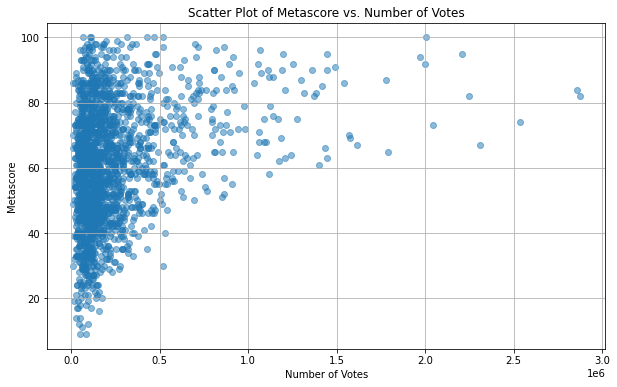

In [10]:
from IMDBAnalysis import plot_metascore_vs_votes
# Plot the metascore versus year
plot_metascore_vs_votes(df)

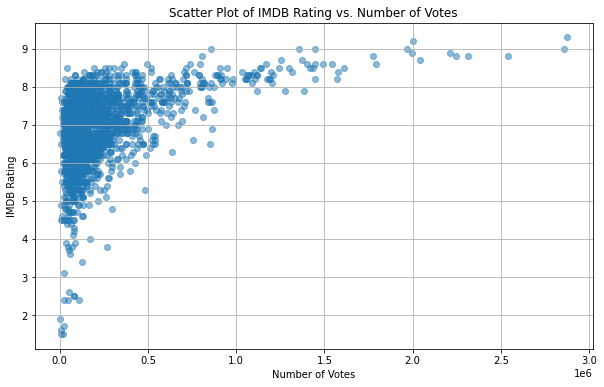

In [11]:
from IMDBAnalysis import plot_imdb_rating_vs_votes
# Plot the IMDB rating versus year
plot_imdb_rating_vs_votes(df)

After our celebrations in establishing the premises that votes positively correlate with ratings, our group was still not fully satisfied. There must be more of a reason why certain movies are highly rated and other movies are not. It cannot simply be that the more popular a movie is, the better ratings it gets. If that fact were merely true, then the Jurassic Park and Star Wars franchises would top our lists.

Therefore, our curousity forced us to keep searching for a more definitive conclusion. Our next thinking led us to consider the starring cast of a movie. The cast play a vital role to the success of any movie. Star power can often correlate to better marketing oppurtunities, which brings in more viewers, and hopefully more votes on IMDB.

In our function below, we first isolated the actors from our dataframe and used Counter to find the actors who are most prevalent in our dataset. Next, we created a dictionary to store information regarding ratings and genres for each actor. We iterated through the rows in our dataset and incremented the count for each actor we found, appended our ratings and genres to incorporate the additional data we got. Finally, for each actor, we calculated their average IMDB Rating, average Metacore, most popular genre, and how many of their movies appear in IMDB's top 2000.

Below we have printed out the resulting top 15 actors that yielded from our function. We wanted to see whether an actor's popularity influenced ratings, however the findings below tell a different story.

The average ratings for the top actors varied. Just because one actor has more movies in the dataset than another actor, it does not mean that they are necesarrily higher rated. The data below shows that the ratings fluctuate for each individual.

However, this exercise is still fruitful. For each actor, we calculated their most popular genre. From the top 15 below, we can see that the genres Drama, Action, and Comedy are the most popular amongst the top actors. As a result, we can conclude that the cast of a movie does not influence ratings and found a new field to investigate.

In [12]:
from IMDBAnalysis import get_top_actors

# Get the top actors (can get as many as you want)
top_actors_info = get_top_actors(df, 15)
for actor, info in top_actors_info.items():
    print(f"Actor: {actor}")
    print(f"Appearance Count: {info['count']}")
    print(f"Average IMDb Rating: {info['avg_imdb_rating']:.2f}")
    print(f"Average Metascore: {info['avg_metascore']:.2f}")
    print(f"Most Popular Genre: {info['most_popular_genre']}")
    print()

Actor: Tom Cruise
Appearance Count: 23
Average IMDb Rating: 6.93
Average Metascore: 58.78
Most Popular Genre: Drama

Actor: Robert De Niro
Appearance Count: 21
Average IMDb Rating: 7.42
Average Metascore: 69.38
Most Popular Genre: Drama

Actor: Tom Hanks
Appearance Count: 21
Average IMDb Rating: 7.43
Average Metascore: 68.95
Most Popular Genre: Drama

Actor: Nicolas Cage
Appearance Count: 19
Average IMDb Rating: 6.55
Average Metascore: 50.47
Most Popular Genre: Drama

Actor: Adam Sandler
Appearance Count: 18
Average IMDb Rating: 6.35
Average Metascore: 44.11
Most Popular Genre: Comedy

Actor: Mel Gibson
Appearance Count: 15
Average IMDb Rating: 7.00
Average Metascore: 58.33
Most Popular Genre: Action

Actor: Arnold Schwarzenegger
Appearance Count: 15
Average IMDb Rating: 6.65
Average Metascore: 52.73
Most Popular Genre: Action

Actor: Johnny Depp
Appearance Count: 15
Average IMDb Rating: 7.30
Average Metascore: 59.40
Most Popular Genre: Drama

Actor: Denzel Washington
Appearance Count:

At this point our group hit a roadblock. We wanted to investigate how genre impacted ratings but we could not find a simple plot that would immediately tell us about the correlation. Therefore, our group came up with a different idea to investigate genres. We will perform Linear Regression analysis on the genres. Our goal is to assign weights each genre where the weight signifies how much it can influence ratings positively or negatively. In our regression, we are choosing to focus on the impact genres have to IMDB rating because the graph we showed above correlating votes to IMDB rating has a better correlation that votes with Metascore.. Therefore, we want to continue to explore the genre bias for IMDB rating. 

As a first step, we are implementing below a one hot encoding function on our genre column. This kind of vector encoding transforms categorical variables into simple binary values. The way our program does this is by splitting apart all the possible values that genre can be. Then for each film, it reads and sees what genres are associated with the film. For example, if the film is of genres, action, fantasy, and horror. Then it will assign a 1 to those genres and a 0 to all the other genres for that film. If you scroll down just a little on this pynb you can see all the different genres we are vector encoding and scrolling even more can show how the one-hot encoding is being implemented. 

In [13]:
from IMDBAnalysis import one_hot_encode_genre_column
df_encoded = one_hot_encode_genre_column(df, column_name='Genre', separator=', ')
df_encoded.head()
df_encoded.columns


Index(['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore',
       'Votes', 'Director', 'Cast', 'Gross', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

The next part of Linear Regression requires us to split our dataset into a training dataset and a testing dataset. Our model will use the training dataset to learn the biases between genre and IMDB rating and will use the testing dataset to verify whether it has accurately predicted the weight values. 

Below you will see the one-hot encoding we mentioned earlier. In this training dataset, each row represents a movie and you can see the genres associated with each movie are marked by 1 and all other genres are marked with a 0.

In [14]:
from IMDBAnalysis import train_test_split
df_encoded.dropna(inplace=True)
X = df_encoded.drop(['Movie Name', 'Release Year', 'Metascore', 'Director', 'Cast', 'Duration', 'Votes', 'Gross', 'IMDB Rating'], axis = 1)
y = df_encoded['IMDB Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 210)
X_train


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
823,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1875,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1787,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
954,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
264,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1242,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1087,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
124,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now we will implement the training and testing sets we created above. Below we implemented a simple linear regression model by creating an instance of Linear Regression from the sklearn library. Then we fit the training sets into this model to yield the coefficients. The coefficients represent the weights/biases that each genre have on the IMDB rating. Next, let us analyze the findings.

In [15]:
from IMDBAnalysis import linear_pred
from IMDBAnalysis import get_mse
from IMDBAnalysis import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(linear_pred(X_train, X_test, y_train))
print('MSE: ', get_mse(y_pred, y_test))

        Feature  Coefficient
0        Action    -0.438604
1     Adventure    -0.127589
2     Animation     0.386862
3     Biography     0.039879
4        Comedy    -0.440195
5         Crime    -0.052619
6   Documentary    -0.134688
7         Drama     0.262423
8        Family    -0.312523
9       Fantasy    -0.334554
10    Film-Noir     0.645761
11      History    -0.144872
12       Horror    -0.629303
13        Music    -0.348513
14      Musical    -0.035218
15      Mystery    -0.101558
16      Romance    -0.353406
17       Sci-Fi    -0.157746
18        Sport    -0.367274
19     Thriller    -0.155639
20          War     0.252169
21      Western     0.237455
MSE:  0.7289290056310174


Here we perform Lasso regression which is an optimized approach to Linear Regression in that it is a better method to diminish the contributions of less important genres to zero and only focus on the genres that actually make an impact towards the IMDB rating.

Below we have used a comparative bar graph to demostrate our findings. The weights calculated for each genre are plotted. Let us analyze what this means.

Having a negative value means that the genre negatively contributes to IMDB rating and having a positive value means the genre positively contributes to IMDB ratings. AS we can see below, Horror genre most negatively affects a films IMDB rating, while a film-noir genre heavily improves a film's IMDB rating.

Western, War, Drama, Biography, and Animation are all genres that also positively contribute towards a film's IMDB rating.

Using Linear Regression, we are able to definitively say that genre also heavily influences a film's IMDB rating. 

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object') [-0.43472359 -0.11949078  0.38525029  0.03766837 -0.43266645 -0.04361581
  0.26777507 -0.30490884 -0.32749632  0.60008984 -0.12499726 -0.61915816
 -0.33505606 -0.01628259 -0.09473058 -0.34570897 -0.15008209 -0.35007661
 -0.1491954   0.24999056  0.22245501]


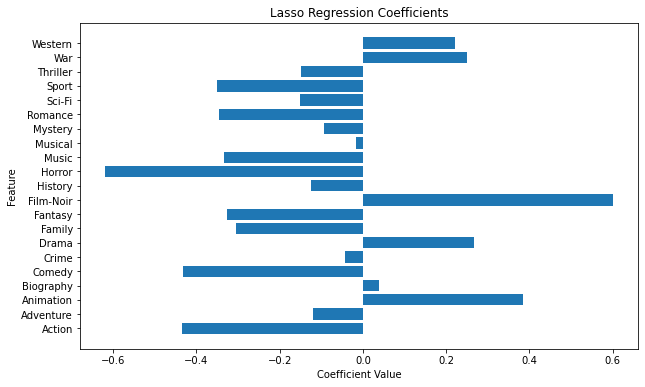

None


In [16]:
from IMDBAnalysis import lasso_reg
from IMDBAnalysis import lasso_plot

selected, coef = lasso_reg(X_train, X_test, y_train)
print(selected, coef)

print(lasso_plot(selected, coef))

Now that we can definitively say that a film's genre and the number of votes the film recieves directly influences the final IMDB rating that the film receives, we believed that from those information we could try and predict what the IMDB rating of a film could be. 

Even though this kind of analysis is beyond the learnings of this course, we already spent so long in analyzing the above data that we felt it would be a disservice to datascience if we didn't push the envelope of the assignment and try to have fun with the dataset. Therefore, we really wanted to try to implement this below analysis. 

Below we have created an implemented a Bayesian Ridge Regression (another form of Linear Regression). We are going to make a new training set and new testing set using similar method as described previously. After we create the training and testing sets, we will fit them into our Bayesian Ridge Regression  model and use it to create predictions for IMDB ratings. Then, we will test our model and compare our predicted IMDB ratings with the actual IMDB ratings of those testing data movies.

In [17]:
X1 = df_encoded.dropna()
X1

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Director,Cast,Gross,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972,175,9.2,100.0,2002655,Francis Ford Coppola,Marlon Brando,134.97,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather Part II,1974,202,9.0,90.0,1358608,Francis Ford Coppola,Al Pacino,57.30,0,...,0,0,0,0,0,0,0,0,0,0
2,Ordinary People,1980,124,7.7,86.0,56476,Robert Redford,Donald Sutherland,54.80,0,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044,David Lean,Peter O'Toole,44.82,0,...,0,0,0,0,0,0,0,0,0,0
5,Close Encounters of the Third Kind,1977,138,7.6,90.0,216050,Steven Spielberg,Richard Dreyfuss,132.09,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,66235,Jean-Marc Vallée,Emily Blunt,11.00,0,...,0,0,0,0,0,0,0,0,0,0
1996,Tooth Fairy,2010,101,5.0,36.0,49527,Michael Lembeck,Dwayne Johnson,60.02,0,...,0,0,0,0,0,0,0,0,0,0
1997,The Informant!,2009,108,6.5,66.0,67318,Steven Soderbergh,Matt Damon,33.31,0,...,0,0,0,0,0,0,0,0,0,0
1998,Youth in Revolt,2009,90,6.4,63.0,75956,Miguel Arteta,Michael Cera,15.28,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
from IMDBAnalysis import remove_commas
df_enc = df_encoded.dropna()
X1 = df_enc

X1['Votes'] = X1['Votes'].apply(remove_commas).astype(float)
df_enc = df_encoded.dropna()

y1 = df_enc['IMDB Rating']  

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=210)

In [19]:
X1_train

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Director,Cast,Gross,Action,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
823,Antz,1998,83,6.5,73.0,163645.0,Eric Darnell,Tim Johnson,90.76,0,...,0,0,0,0,0,0,0,0,0,0
1875,Winter's Bone,2010,100,7.1,90.0,150225.0,Debra Granik,Jennifer Lawrence,6.53,0,...,0,0,0,1,0,0,0,0,0,0
1787,Valkyrie,2008,121,7.1,56.0,258562.0,Bryan Singer,Tom Cruise,83.08,0,...,0,0,0,0,0,0,0,1,0,0
954,Pi,1998,84,7.3,72.0,186099.0,Darren Aronofsky,Sean Gullette,3.22,0,...,1,0,0,1,0,0,0,0,0,0
264,Gandhi,1982,191,8.0,79.0,239845.0,Richard Attenborough,Ben Kingsley,52.77,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,What Lies Beneath,2000,130,6.6,51.0,135334.0,Robert Zemeckis,Harrison Ford,155.46,0,...,1,0,0,1,0,0,0,0,0,0
1242,Bulletproof Monk,2003,104,5.5,40.0,52102.0,Paul Hunter,Chow Yun-Fat,23.02,1,...,0,0,0,0,0,0,0,0,0,0
1087,One Hour Photo,2002,96,6.8,64.0,131418.0,Mark Romanek,Robin Williams,31.60,0,...,0,0,0,0,0,0,0,1,0,0
124,Superman II,1980,127,6.8,83.0,114301.0,Richard Lester,Gene Hackman,108.19,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
from IMDBAnalysis import ridge_reg

num_features = ['Duration', 'Votes', 'Gross']
cat_features = selected

y_pred = ridge_reg(num_features, cat_features, X1_train, y1_train, X1_test)

Below we have charted and plotted the predicted IMDB ratings our model generated and the actual IMDB ratings of the movies in our testing set. As you can see, our prediction model has many instances where it predicts quite closely the IMDB rating of a movie. However, there are also instances where our prediction model is quite off. 

Below, you can see our accuracies in the chart and especially in the plotted graph we made. Each index represents a movie and the multicolored lines represent our predicted Ratings and the Actual IMDB ratings of the testing set.

In [21]:
from IMDBAnalysis import get_res_df

res = get_res_df(y_pred, X1_test)
res


,Predicted,Actual
0,7.014700,7.4
1,6.251402,5.4
2,6.877414,7.8
3,6.353921,5.4
4,6.433343,5.5
...,...,...
369,6.569110,7.0
370,6.928989,7.3
371,6.673015,7.2
372,6.880175,6.8


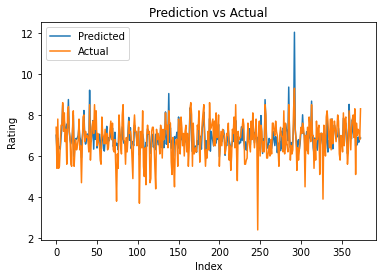

In [22]:
from IMDBAnalysis import plot_pred_act

plot_pred_act(res)

## Conclusion

Let us now reflect on the findings of our project. We set about with the goal of finding what factors directly influence a movie's ratings. We explored the factors Gross revenue, release year, number of votes, cast, and genre to determine that the genre of a movie and the number of votes it recieves influences its ratings.

To summarize our results:

The greater number of votes that a movie recieves, it has a higher chance of recieving a better IMDB rating.

Different genres have varying impacts that either positively or negatively influence a movie's IMDB ratings.

Let us first try to explain why we believe the number of votes matter. Our theory relates to human behavior. In the instance when someone watches a movie, they may have many different reactions to the experience. But two examples are that they could hate the experience or they could love the experience. If someone absolutely hates the experience, they will want to leave a negative review. When they go to IMDB and see the movie has no ratings, they may leave a scathing review. However, if they see the movie is already very low rated and there are scathing reviews, they may think that there is no need to waste any more time on the film. However, in our dataset, none of these movies are "bad" because they are in IMDB's top 2000 movies dataset. Therefore, it could just be a case that people watch the movie and are rather unmoved by the experience and don't feel the need to go and improve the rating the movie has.

However, if a critic goes and absolutely enjoys the film experience, they may be more inclined to demonstrate their excitement and write about it. Even if a person in the 2010's sees a movie from the 1900's and enjoys the film, they will be more willing to write a positive review. So they will go to the IMDB website and may see that the movie may not have a high enough rating than what they deem. Therefore, they may be more willing to write a positive review to help increase or maintain a high rating.

Genre, however, may have a more nuanced impact on IMDB ratings. This nuance is because genre can influence the entertainment experience and the audience that the movie may draw. An action or comedy film is intended for mass consumption. Usually, the everyday movie go-er will be the ones viewing these films. These everyday enthusiasts may not have an IMDB account or be willing to take time out of their lives to write cronstructive reviews. However, genres like film-noir cater to a more niche audience who consider themselves to be film connoisseurs. Consequently, the directors know that the genre dictates a certain level of dilligence and standard in film making. Therefore, they need to be highly elevated cinematic works to qualify for that genre. As such, people may find them more cinematically appealing and sophisticated resulting in higher ratings. 

Overall, we as a group thoroughly enjoyed analyzing this data. We hope you enjoyed reading through our code and our explanations helped guide